# Лабораторная работа № 6

### В данной лабораторной работе нужно найти минимум заданной функции методом Ньютона . $$f(x_1,x_2)=x_1^2+x_2^2-0.5x_1-1.6x_2+2$$ В конце работы оценили овражность ,а так же исследовали условие сходимости. Были построены график функции,траектория поиска и линии уровня, а так же сделано дополнительное задание для трех переменных . В конце работы представлен вывод . 

#### Выполнил Железов Владислав(431 группа)Вариант 5

### Метод Ньютона . Для получения итерационной формулы этого метода используется разложение функции $f(x)$ в ряд Тейлора 2-го порядка. И приравнивая разложение к 0. Получаем точку где функция достигает глобального минимума  $x^{k+1}=x^k-∇f(x^k){[∇^2f(x^k)]}^{-1}$(где $[∇^2f(x)]$ -матрица Гессе (гессиан) функцииf(x)) Если точка $x^{k+1}$ достаточно близка к $x^k$, справедливо неравенство $f(x^{k+1})< f(x^k)$ , т.е. $x^{k+1}$ естественно взять следующим за $x^k$ приближением к решению задачи .  Таким образом, в этом методе $α= 1$,$p^k=−([∇^2f(x^k)])^{−1}∇f(x^k)$.  Практически $p^k$ удобнее искать не по формуле , а решая систему линейных уравнений $[∇^2f(x^k)]p^k=−∇f(x^k)$ одним из прямых или итерационных методов (см. соотвествующие лабораторные работы), исключая тем самым операцию обращения матрицы Гессе. Отметим, что для квадратичной функции f(x) метод Ньютона сходится за один шаг. Для достаточно гладкой функции f(x) с положительно определенной матрицей Гессе при удачном выборе начального приближения итерационная последовательность метода Ньютона сходится к точке минимума с квадратичной скоростью. Однако, найти удачное начальное приближение - задача довольно сложная, требующая определенного искусства. Модифицируя метод Ньютона введением переменного множителя получают методы спуска, сходящиеся при любом начальном приближении .



In [1]:
import numpy as np
from scipy import *
from math import *
from scipy.linalg import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pylab

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from pylab import *
from scipy.linalg import *

### Нахождение сообственных значений в матрице Гессе, для оценки овражности.

In [3]:
def f(x):
    return ((x[0])^2+(x[1])^2-0.5*x[0]-1.6*x[1]+2)
def grad(x):
    return np.array([2*x[0]-0.5, 2*x[1]-1.6])
def gess(x):
    return np.array([2,0,0,2]).reshape((2,2))
x=linspace(0,1,1)
g=gess(x)
linalg.eig(g)


(array([ 2.,  2.]), array([[ 1.,  0.],
        [ 0.,  1.]]))

### Построение 3D графика функции

In [51]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
% matplotlib qt
def makeData ():
    x = np.arange (-10, 10, 0.1)
    y = np.arange (-10, 10, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)

    zgrid = (xgrid)**2+(ygrid)**2-0.5*(xgrid)-1.6*(ygrid)+2
    return xgrid, ygrid, zgrid

x, y, z = makeData()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z)

pylab.show()

### Метод Ньютона

In [47]:
def f(xb,xz):
    return ((xb)**2+(xz)**2-0.5*xb-1.6*xz+2)
def grad0(x0):
    return np.array([2*x0-0.5])
def grad1(x1):
    return np.array([2*x1-1.6])
def gess(x):
    return np.array([2,0,0,2]).reshape((2,2))
def minn(f,e):
    x0=1
    x1=-1
    n=-1
    d=0
    e=0.01
    while True:
        r=f(x0,x1)
        L1=[]
        L2=[]
        p0=-grad0(x0)/2
        p1=-grad1(x1)/2
        x0=x0+p0
        x1=x1+p1
        L1.append(x0)
        L2.append(x1)
        d=f(x0,x1)
        n=n+1
        if (r-d)<e:
            print (L1,L2)
            return d,n
j=minn(f,e)
print (j)
        

[array([[ 0.25]])] [array([[ 0.8]])]
(array([[ 1.2975]]), 1)


### Построение линий уровня, и траектории поиска

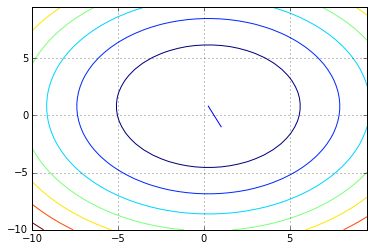

In [31]:

def f(xh,xj):
    return ((xh)**2+(xj)**2-0.5*xh-1.6*xj+2)
A=np.array([1,-1,0.25,0.8]).reshape((2,2))
x = np.arange (-10, 10, 0.5)
y = np.arange (-10, 10, 0.5)
xg, yg = np.meshgrid(x, y)
z =f(xg,yg)
pylab.contour(xg, yg, z)
pylab.plot(A[:,0] ,A[:,1])
pylab.grid(True)
pylab.show()

### Метод Ньютона для 3 переменных

In [27]:
def f(x0,x1,x2):
    return ((x0)**2+(x1)**2+3*(x2)**2-0.5*x0-1.6*x1-0.9*x2+2)
def grad(x0,x1,x2):
    return np.array([2*x0-0.5, 2*x1-1.6,6*x2-0.9])
def gess(x):
    return np.array([2,0,0,2,0,6]).reshape((2,3))
def minn(i):
    x0=1
    x1=-1
    x2=-2
    n=0
    d=0
    while True:
        r=d
        L=[]
        r=(x0)**2+(x1)**2+3*(x2)**2-0.5*x0-1.6*x1-0.9*x2+2
        p0=-(2*x0-0.5)/2
        p1=-(2*x1-1.6)/2
        p2=-(6*x2-0.9)/6
        x0=x0+p0
        x1=x1+p1
        x2=x2+p2
        d=(x0)**2+(x1)**2+3*(x2)**2-0.5*x0-1.6*x1-0.9*x2+2
        n=n+1
        if (d-r)<0.01:
            return d,n
i=linspace(0,1,1)
j=minn(i)
print (j)

(1.23, 1)


## Вывод : Из результатов первой программы мы получили ,что овражность равна 1. По построенным графикам смогли проанализировать полученное решение .Сходимость определятся сильной выпуклостью функции вниз (это говорится в теореме 2 ) . Так как сходимость зависит от выбора начальной точки и  параметров итерационного процесса. Начальная точка была выбрана достаточно близко к точке минимума, что обеспечило быструю сходимость, и достаточную верность полученного результата. О чем свидетельствует график линий уровня.